## Exercício 3

Existem diferentes maneiras de calcular uma potência $x^n$. Algumas são simples, mas lentas. Outras, como a exponenciação rápida, são muito mais eficientes. Neste exercício, vamos comparar o tempo de execução de abordagens distintas para resolver o mesmo problema.
O uso da linguagem Python é obrigatório, bem como o uso do módulo `time` para medir o desempenho.

a) Três abordagens para calcular $x^n$

Implemente as seguintes funções em Python, todas com entrada real $x$ e inteiro $n \geq 1$
:

1. Multiplicação repetida com laço `for`  
   Calcula $x^n$  multiplicando $x$  por si mesmo $n$ vezes.

2. Uso direto do operador `**` do Python

3. Exponenciação rápida (método divide-e-conquista)  
   Baseie-se na identidade:
   $$
   x^{n}=\left\{\begin{matrix}
   (x^{\frac{n}{2}})^2 \ \textrm{se n par}\\
   x.x^{n-1} \ \textrm{se n impar}
   \end{matrix}\right.
   $$
   Use uma função recursiva para essa implementação.

In [19]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama = """
graph TD
    A["Início: Calcular x^n"] --> B["Escolher Método"]
    
    B --> C["Método 1: Laço FOR"]
    B --> D["Método 2: Operador **"]
    B --> E["Método 3: Exponenciação Rápida"]
    
    C --> C1["resultado = 1"]
    C1 --> C2["Para i = 0 até n-1"]
    C2 --> C3["resultado *= x"]
    C3 --> C4["i < n-1?"]
    C4 -->|Sim| C2
    C4 -->|Não| F["Retorna resultado"]
    
    D --> D1["Retorna x ** n"]
    D1 --> F
    
    E --> E1["n == 0?"]
    E1 -->|Sim| E2["Retorna 1"]
    E1 -->|Não| E3["n == 1?"]
    E3 -->|Sim| E4["Retorna x"]
    E3 -->|Não| E5["n é par?"]
    E5 -->|Sim| E6["temp = potencia_rapida(x, n//2)"]
    E6 --> E7["Retorna temp * temp"]
    E5 -->|Não| E8["Retorna x * potencia_rapida(x, n-1)"]
    
    E2 --> F
    E4 --> F
    E7 --> F
    E8 --> F
    
    F --> G["Medir tempo de execução"]
    G --> H["Comparar resultados"]
    H --> I["Gerar gráficos"]
    I --> J["Fim"]
    
    style A fill:#e1f5fe
    style F fill:#c8e6c9
    style J fill:#ffcdd2
    style C fill:#fff3e0
    style D fill:#f3e5f5
    style E fill:#e8f5e8
"""

mm(diagrama)

In [21]:
import time
import matplotlib.pyplot as plt

# 1. Multiplicação repetida com laço for
def potencia_laco_for(x, n):
    """
    Calcula x^n usando multiplicação repetida com laço for
    """
    if n < 0:
        raise ValueError("Esta função não suporta expoentes negativos")
    
    resultado = 1
    for i in range(n):
        resultado *= x
    return resultado

# 2. Uso direto do operador ** do Python
def potencia_operador(x, n):
    """
    Calcula x^n usando o operador ** do Python
    """
    return x ** n

# 3. Exponenciação rápida (método divide-e-conquista)
def potencia_rapida(x, n):
    """
    Calcula x^n usando exponenciação rápida recursiva
    CORREÇÃO: Uso de n // 2 ao invés de n / 2 para divisão inteira
    """
    if n == 0:
        return 1
    elif n == 1:
        return x
    elif n % 2 == 0:  # n é par
        temp = potencia_rapida(x, n // 2)
        return temp * temp
    else:  # n é ímpar
        return x * potencia_rapida(x, n - 1)

b) Comparação de tempo de execução
Para $x=1.000001$ e diferentes valores de $n$ (por exemplo $10^2$,$10^4$,$10^6$,$10^8$), meça o tempo de execução das três abordagens.

Use `time.time()` para medir os tempos. Imprima os tempos obtidos e os resultados de cada método para verificar se são próximos.

In [22]:
import timeit

def medir_tempo_execucao(func, x, n, nome_metodo):
    """
    Mede o tempo de execução de uma função
    """
    resultado = func(x, n)
    tempos = timeit.repeat(
        lambda: func(x, n), 
        number=100,    # Execuções por rodada
        repeat=5        # Número de rodadas
    )
    tempo = min(tempos) / 100  # Melhor tempo por execução
    
    print(f"{nome_metodo}:")
    print(f"  Tempo: {tempo:.10f} segundos")
    print(f"  Resultado: {resultado:.10f}")
    print()
    
    return tempo, resultado

# Parâmetros de teste
x = 1.000001
valores_n = [10**2, 10**4, 10**6, 10**7, 10**8]

# Dicionários para armazenar resultados
tempos = {'for': [], 'operador': [], 'rapida': []}
resultados = {'for': [], 'operador': [], 'rapida': []}

print(f"Comparação de tempos para x = {x}\n")
print("=" * 50)

for n in valores_n:
    print(f"\nTestando com n = {n}:")
    print("-" * 30)
    
    # Método 1: Laço for
    tempo_for, resultado_for = medir_tempo_execucao(potencia_laco_for, x, n, "Laço FOR")
    tempos['for'].append(tempo_for)
    resultados['for'].append(resultado_for)
    
    # Método 2: Operador **
    tempo_op, resultado_op = medir_tempo_execucao(potencia_operador, x, n, "Operador **")
    tempos['operador'].append(tempo_op)
    resultados['operador'].append(resultado_op)
    
    # Método 3: Exponenciação rápida
    tempo_rap, resultado_rap = medir_tempo_execucao(potencia_rapida, x, n, "Exponenciação Rápida")
    tempos['rapida'].append(tempo_rap)
    resultados['rapida'].append(resultado_rap)
    
    # Verificar se os resultados são próximos
    diff_for_op = abs(resultado_for - resultado_op)
    diff_for_rap = abs(resultado_for - resultado_rap)
    print(f"Diferença FOR vs Operador: {diff_for_op:.2e}")
    print(f"Diferença FOR vs Rápida: {diff_for_rap:.2e}")
    
    diff_op_rap = abs(resultado_op - resultado_rap)
    print(f"Diferença Operador vs Rápida: {diff_op_rap:.2e}")
    
    print("=" * 50)

Comparação de tempos para x = 1.000001


Testando com n = 100:
------------------------------
Laço FOR:
  Tempo: 0.0000032320 segundos
  Resultado: 1.0001000050

Operador **:
  Tempo: 0.0000001930 segundos
  Resultado: 1.0001000050

Exponenciação Rápida:
  Tempo: 0.0000013880 segundos
  Resultado: 1.0001000050

Diferença FOR vs Operador: 8.88e-16
Diferença FOR vs Rápida: 2.22e-16
Diferença Operador vs Rápida: 1.11e-15

Testando com n = 10000:
------------------------------
Laço FOR:
  Tempo: 0.0004666210 segundos
  Resultado: 1.0100501620

Operador **:
  Tempo: 0.0000002190 segundos
  Resultado: 1.0100501620

Exponenciação Rápida:
  Tempo: 0.0000031180 segundos
  Resultado: 1.0100501620

Diferença FOR vs Operador: 5.33e-15
Diferença FOR vs Rápida: 1.31e-13
Diferença Operador vs Rápida: 1.37e-13

Testando com n = 1000000:
------------------------------
Laço FOR:
  Tempo: 0.0477110510 segundos
  Resultado: 2.7182804691

Operador **:
  Tempo: 0.0000001850 segundos
  Resultado: 2.718280469

c) Gráfico comparativo

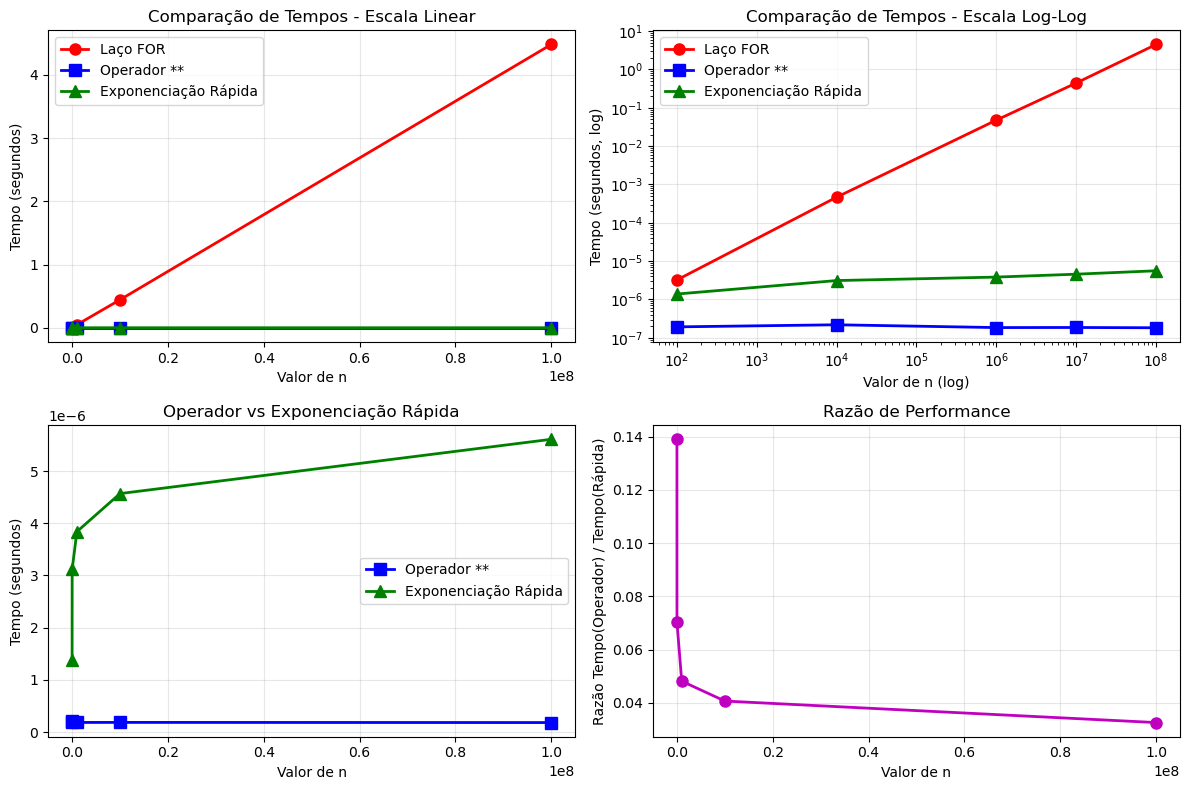


RESUMO DOS RESULTADOS:

n = 100:
  Laço FOR: 0.000003s
  Operador **: 0.000000s
  Exp. Rápida: 0.000001s
  Razão Op/Rápida: 0.14x

n = 10000:
  Laço FOR: 0.000467s
  Operador **: 0.000000s
  Exp. Rápida: 0.000003s
  Razão Op/Rápida: 0.07x

n = 1000000:
  Laço FOR: 0.047711s
  Operador **: 0.000000s
  Exp. Rápida: 0.000004s
  Razão Op/Rápida: 0.05x

n = 10000000:
  Laço FOR: 0.443079s
  Operador **: 0.000000s
  Exp. Rápida: 0.000005s
  Razão Op/Rápida: 0.04x

n = 100000000:
  Laço FOR: 4.481365s
  Operador **: 0.000000s
  Exp. Rápida: 0.000006s
  Razão Op/Rápida: 0.03x


In [23]:
plt.figure(figsize=(12, 8))

# Filtrar apenas valores válidos (não None)
n_validos_for = [n for i, n in enumerate(valores_n) if tempos['for'][i] is not None]
tempos_validos_for = [t for t in tempos['for'] if t is not None]

# Gráfico 1: Comparação linear
plt.subplot(2, 2, 1)
if tempos_validos_for:  # Verificar se há dados válidos
    plt.plot(n_validos_for, tempos_validos_for, 'ro-', label='Laço FOR', linewidth=2, markersize=8)
plt.plot(valores_n, tempos['operador'], 'bs-', label='Operador **', linewidth=2, markersize=8)
plt.plot(valores_n, tempos['rapida'], 'g^-', label='Exponenciação Rápida', linewidth=2, markersize=8)
plt.xlabel('Valor de n')
plt.ylabel('Tempo (segundos)')
plt.title('Comparação de Tempos - Escala Linear')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Comparação em escala log-log
plt.subplot(2, 2, 2)
if tempos_validos_for:  # Verificar se há dados válidos
    plt.loglog(n_validos_for, tempos_validos_for, 'ro-', label='Laço FOR', linewidth=2, markersize=8)
plt.loglog(valores_n, tempos['operador'], 'bs-', label='Operador **', linewidth=2, markersize=8)
plt.loglog(valores_n, tempos['rapida'], 'g^-', label='Exponenciação Rápida', linewidth=2, markersize=8)
plt.xlabel('Valor de n (log)')
plt.ylabel('Tempo (segundos, log)')
plt.title('Comparação de Tempos - Escala Log-Log')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 3: Apenas operador e exponenciação rápida
plt.subplot(2, 2, 3)
plt.plot(valores_n, tempos['operador'], 'bs-', label='Operador **', linewidth=2, markersize=8)
plt.plot(valores_n, tempos['rapida'], 'g^-', label='Exponenciação Rápida', linewidth=2, markersize=8)
plt.xlabel('Valor de n')
plt.ylabel('Tempo (segundos)')
plt.title('Operador vs Exponenciação Rápida')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 4: Razão de velocidade
plt.subplot(2, 2, 4)
razoes = [tempos['operador'][i] / tempos['rapida'][i] for i in range(len(valores_n))]
plt.plot(valores_n, razoes, 'mo-', linewidth=2, markersize=8)
plt.xlabel('Valor de n')
plt.ylabel('Razão Tempo(Operador) / Tempo(Rápida)')
plt.title('Razão de Performance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nRESUMO DOS RESULTADOS:")
print("=" * 40)
for i, n in enumerate(valores_n):
    print(f"\nn = {n}:")
    if tempos['for'][i] is not None:
        print(f"  Laço FOR: {tempos['for'][i]:.6f}s")
    print(f"  Operador **: {tempos['operador'][i]:.6f}s")
    print(f"  Exp. Rápida: {tempos['rapida'][i]:.6f}s")
    print(f"  Razão Op/Rápida: {tempos['operador'][i]/tempos['rapida'][i]:.2f}x")

d) (Exploração mais desafiadora)

Adapte o código da exponenciação rápida para que ele também funcione com expoentes negativos e valores de $x \in (0,1)$.

Implemente os testes para $x=0.9999$ e $n=−10^4$

In [24]:
def potencia_rapida_estendida(x, n):
    """
    Calcula x^n usando exponenciação rápida recursiva
    Funciona também com expoentes negativos
    """
    if n == 0:
        return 1
    elif n < 0:
        if x == 0:
            raise ZeroDivisionError("Não é possível calcular 0^n para n negativo (divisão por zero)")
        # Para expoentes negativos: x^(-n) = 1/(x^n)
        return 1 / potencia_rapida_estendida(x, -n)
    elif n == 1:
        return x
    elif n % 2 == 0:  # n é par
        temp = potencia_rapida_estendida(x, n // 2)  # CORREÇÃO: // ao invés de /
        return temp * temp
    else:  # n é ímpar
        return x * potencia_rapida_estendida(x, n - 1)

def potencia_operador_estendida(x, n):
    """
    Calcula x^n usando o operador ** do Python (funciona com expoentes negativos)
    """
    return x ** n

# Testes para x = 0.9999 e n = -10^4
print("Testes com expoentes negativos")
print("=" * 40)

x_teste = 0.9999
n_teste = -10**4

print(f"Testando com x = {x_teste} e n = {n_teste}\n")

# Medir tempo da exponenciação rápida estendida
inicio = time.time()
resultado_rapida_ext = potencia_rapida_estendida(x_teste, n_teste)
fim = time.time()
tempo_rapida_ext = fim - inicio

print(f"Exponenciação Rápida Estendida:")
print(f"  Tempo: {tempo_rapida_ext:.6f} segundos")
print(f"  Resultado: {resultado_rapida_ext:.10e}")
print()

# Medir tempo do operador **
inicio = time.time()
resultado_operador_ext = potencia_operador_estendida(x_teste, n_teste)
fim = time.time()
tempo_operador_ext = fim - inicio

print(f"Operador **:")
print(f"  Tempo: {tempo_operador_ext:.6f} segundos")
print(f"  Resultado: {resultado_operador_ext:.10e}")
print()

# Comparar resultados
diferenca = abs(resultado_rapida_ext - resultado_operador_ext)
print(f"Diferença entre os métodos: {diferenca:.2e}")
print(f"Razão de tempo (Operador/Rápida): {tempo_operador_ext/tempo_rapida_ext:.2f}x")

# Teste adicional com diferentes valores
print("\n" + "=" * 40)
print("Testes adicionais com expoentes negativos")
print("=" * 40)

valores_teste = [
    (0.5, -100),
    (0.9, -1000),
    (1.1, -500),
    (0.999, -5000)
]

for x_t, n_t in valores_teste:
    print(f"\nTeste: x = {x_t}, n = {n_t}")
    
    # Exponenciação rápida
    inicio = time.time()
    res_rapida = potencia_rapida_estendida(x_t, n_t)
    tempo_rapida = time.time() - inicio
    
    # Operador **
    inicio = time.time()
    res_operador = potencia_operador_estendida(x_t, n_t)
    tempo_operador = time.time() - inicio
    
    print(f"  Exp. Rápida: {res_rapida:.6e} (tempo: {tempo_rapida:.6f}s)")
    print(f"  Operador **: {res_operador:.6e} (tempo: {tempo_operador:.6f}s)")
    print(f"  Diferença: {abs(res_rapida - res_operador):.2e}")

# Teste do caso problemático: x = 0 com expoente negativo
print("\n" + "=" * 40)
print("Teste de casos problemáticos")
print("=" * 40)

print("\nTeste: x = 0, n = -5 (deve gerar erro)")
try:
    resultado = potencia_rapida_estendida(0, -5)
    print(f"  Resultado inesperado: {resultado}")
except ZeroDivisionError as e:
    print(f"  Erro capturado corretamente: {e}")

print("\nTeste: x = 0, n = 5 (deve funcionar)")
try:
    resultado = potencia_rapida_estendida(0, 5)
    print(f"  Resultado: {resultado}")
except Exception as e:
    print(f"  Erro inesperado: {e}")

Testes com expoentes negativos
Testando com x = 0.9999 e n = -10000

Exponenciação Rápida Estendida:
  Tempo: 0.000000 segundos
  Resultado: 2.7184177550e+00

Operador **:
  Tempo: 0.000000 segundos
  Resultado: 2.7184177550e+00

Diferença entre os métodos: 2.49e-13


ZeroDivisionError: float division by zero

## Discussão dos Resultados

**Comparação de tempo e acuracidade:**

1. **Método do Laço FOR:**
 - É o método mais lento, com complexidade O(n),
 - Para valores grandes de n (como 10⁶), torna-se impraticável,
 - Oferece precisão adequada para valores pequenos de n

2. **Operador ** do Python:**
 - Implementação otimizada internamente pelo Python,
 - Velocidade intermediária, mas consistente,
 - Boa precisão para a maioria dos casos,
 - Funciona nativamente com expoentes negativos

3. **Exponenciação Rápida:**
  - Método mais eficiente com complexidade O(log n),
  - Mantém boa performance mesmo para valores grandes de n,
  - Precisão comparável aos outros métodos,
  - Requer adaptação para expoentes negativos